In [1]:
from parse_JFL import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def z(r,R,Q):
    return (1/R)*r**2/(1+np.sqrt(1-(1+Q**2)*(1/R)**2*r**2))

In [3]:
microlens_semi_diameter = 1.1/2
microlens_R=107.4545
microlens_Q=0
base_lens_R=234.6 
base_lens_semi_diameter = 5.15
base_lens_Q=0
whole_lens_semi_diameter=7

base_lens_back_R=107.4545
base_lens_back_Q=0
base_lens_back_semi_diameter=5.12

center_thickness=0.2

In [4]:
base_file_path = 'MCOK001OS.JFL'  
segments = parse_jfl_file(base_file_path)

In [5]:
microlens_x=find_x_in_range(segments,'F', 
    0, microlens_semi_diameter)
base_lens_x=find_x_in_range(segments,'F', 
    microlens_semi_diameter, base_lens_semi_diameter)
base_lens_back_x=find_x_in_range(segments,'B', 
    0, base_lens_back_semi_diameter)

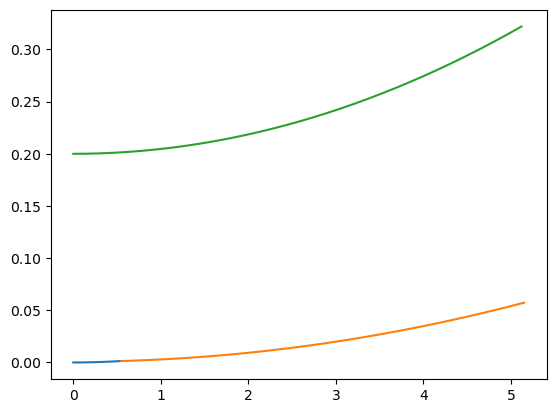

In [6]:
microlens_sag=z(microlens_x,microlens_R,microlens_Q)
base_lens_sag_tmp=z(base_lens_x,base_lens_R,base_lens_Q)
delta_sag=microlens_sag[0]-base_lens_sag_tmp[-1]
base_lens_sag=base_lens_sag_tmp+delta_sag
base_lens_back_sag=z(base_lens_back_x,base_lens_back_R,base_lens_back_Q)+center_thickness
plt.plot(microlens_x,microlens_sag)
plt.plot(base_lens_x,base_lens_sag)
plt.plot(base_lens_back_x,base_lens_back_sag)
plt.show()

Segment F replaced successfully.
Segment F replaced successfully.
Segment F translated successfully.
Segment B replaced successfully.
Segment B translated successfully.
Segment E translated successfully.


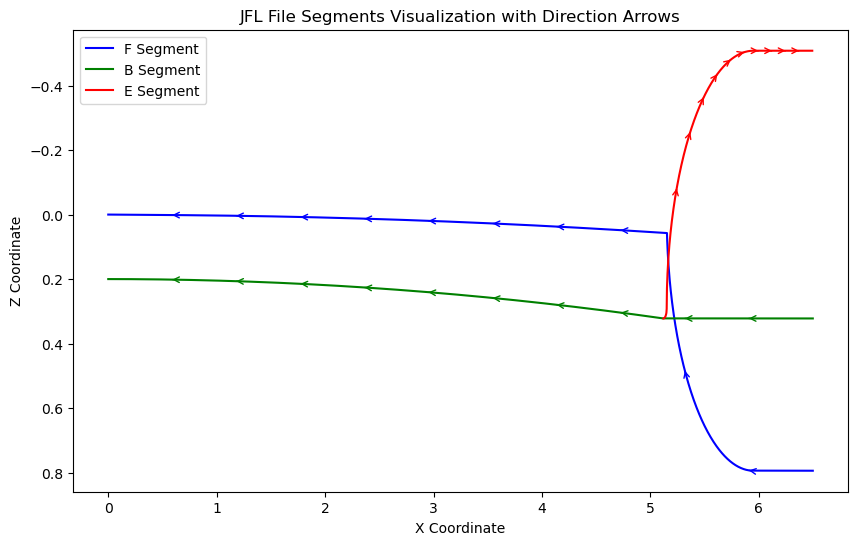

<module 'matplotlib.pyplot' from 'c:\\Users\\goldengrape\\miniconda3\\envs\\cv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [7]:
segments1=replace_segment(segments,'F',
            0,
            microlens_semi_diameter,
            microlens_sag)
segments2=replace_segment(segments1,'F',
            microlens_semi_diameter,
            base_lens_semi_diameter,
            base_lens_sag)
segments3=translate_segment(segments2,'F',
            base_lens_semi_diameter,whole_lens_semi_diameter,
            base_lens_sag[0])
segments4=replace_segment(segments3,'B',
            0,
            base_lens_back_semi_diameter,
            base_lens_back_sag)
segments5=translate_segment(segments4,'B',
            base_lens_back_semi_diameter,whole_lens_semi_diameter,
            base_lens_back_sag[0])
segments6=translate_segment(segments5,'E',
            base_lens_back_semi_diameter,whole_lens_semi_diameter,
            base_lens_back_sag[0],head='min')
plot_jfl_segments_with_arrows(segments6)

In [8]:
save_jfl_file(segments6,'new.JFL')

File saved successfully to new.JFL
